##### Ana Cristina Zanetti
##### Mauro Roberto Domingues Junior


---



## Descrição do problema e explanção dos dados

##### Construir um modelo de aprendizado supervisionado que possa classificar a pontuação de crédito de um cliente em poor, standard ou good.

##### Para construir este modelo, será utilizado um histórico de clientes disponibilizado em arquivo que contém:

1. ID -> Representa a identificação única para um registro de entrada
1. Customer_ID -> Representa a identificação única de um cliente
1. Month -> Representa o mês de criação do registro
1. Name -> Representa o nome do cliente
1. Age -> Representa a idade do cliente
1. SSN - Seguro social -> Representa o número de seguro social do cliente
1. Occupation -> Representa a ocupação/profissão do cliente
1. Annual_Income0- Renda Anual -> Representa a renda anual do cliente
1. Monthly_Inhand_Salary -> Representa o salário base mensal do cliente
1. Num_Bank_Accounts -> Representa o número de contas bancárias que o cliente possui
1. Num_Credit_Card -> Representa o número de cartões de crédito detidos pelo cliente
1. Interest_Rate -> Representa a taxa de juros
1. Num_of_Loan -> Representa o número de empréstimos contraídos no banco
1. Type_of_Loan -> Representa os tipos de empréstimo tomados pelo cliente
1. Delay_from_due_date -> Representa o número médio de dias de atraso desde a data de pagamento
1. Num_of_Delayed_Payment -> Representa o número médio de pagamentos atrasados ​​pelo cliente
1. Changed_Credit_Limit -> Representa a variação percentual no limite de crédito
1. Num_Credit_Inquiries -> Representa o número de consultas ao crédito
1. Credit_Mix -> Representa a classificação do mix de créditos
1. Outstanding_Debt -> Representa o total da dívida atual a ser paga (em USD)
1. Credit_Utilization_Ratio -> Representa a taxa de utilização de crédito
1. Credit_History_Age -> Representa a idade do histórico de crédito do cliente
1. Payment_of_Min_Amount -> Representa se apenas o valor mínimo foi pago pelo cliente
1. Total_EMI_per_month -> Representa os pagamentos mensais do EMI (parcelas do empréstimo em USD)
1. Amount_invested_monthly -> Representa o valor mensal investido pelo cliente (em USD)
1. Payment_Behaviour -> Representa o comportamento de pagamento do cliente (em USD)
1. Monthly_Balance -> Representa o valor do saldo mensal do cliente (em USD)
1. Credit_Score -> Representa a faixa de pontuação de crédito (ruim, padrão, bom)



## Análise de Dados Exploratória (*EDA*)

##### Importação de bibliotecas

In [40]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


##### Carregando o conjunto de dados

In [41]:
df_credito = pd.read_csv('supervisionado/dataset/train.csv')
df_credito.head()

<ipython-input-41-0b5f03d9f211>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_credito = pd.read_csv('supervisionado/dataset/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


*Observado já na carga,que a coluna Monthly_Balance, precisa ser trabalhada, tem vários tipos de dados, porém deveria ser numérica*

##### Informações sobre o dataset

In [42]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

*Muitos campos numéricos estão com object*

##### Todas as colunas relacionadas a identificação únicas de registros ou de cliente serão excluídas por não contribuírem para o Credit Score

In [43]:
colunas_excluir = ['ID', 'Customer_ID', 'Name','SSN','Month']
df_credito = df_credito.drop(colunas_excluir, axis=1)

In [44]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

##### Funções para Limpeza dos dados

In [45]:
# Remover caracteres não numericos
def remover_nao_numericos(coluna):
      return coluna.apply(lambda valor: re.sub(r'[^-\d.]', '', str(valor)))

# Transformar em número
def transformar_em_numero(coluna):
      return pd.to_numeric(coluna, errors='coerce')

# Limpar valores negativos
def limpar_valores_negativos(coluna):
      return coluna.apply(lambda valor: None if valor < 0 else valor)

# Delimitar valores das colunas
def delimitar_valores(coluna, limite_inferior, limite_superior):
        return coluna.apply(lambda valor: valor if limite_inferior <= valor <= limite_superior else np.nan)


##### Converter os dados

In [46]:
colunas_converter_numericas = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [47]:
colunas_converter_cat = ['Occupation',  'Type_of_Loan', 'Credit_Mix','Payment_of_Min_Amount','Credit_Score','Payment_Behaviour']
df_credito[colunas_converter_cat] = df_credito[colunas_converter_cat].astype('category')

In [48]:
for coluna in colunas_converter_numericas:
    df_credito[coluna] = remover_nao_numericos(df_credito[coluna])
    df_credito[coluna] = transformar_em_numero(df_credito[coluna])

In [49]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Age                       100000 non-null  int64   
 1   Occupation                100000 non-null  category
 2   Annual_Income             100000 non-null  float64 
 3   Monthly_Inhand_Salary     84998 non-null   float64 
 4   Num_Bank_Accounts         100000 non-null  int64   
 5   Num_Credit_Card           100000 non-null  int64   
 6   Interest_Rate             100000 non-null  int64   
 7   Num_of_Loan               100000 non-null  int64   
 8   Type_of_Loan              88592 non-null   category
 9   Delay_from_due_date       100000 non-null  int64   
 10  Num_of_Delayed_Payment    92998 non-null   float64 
 11  Changed_Credit_Limit      97909 non-null   float64 
 12  Num_Credit_Inquiries      98035 non-null   float64 
 13  Credit_Mix                1000

##### Dados numéricos

In [50]:
df_credito.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [51]:
colunas_num = df_credito.select_dtypes(include='number')

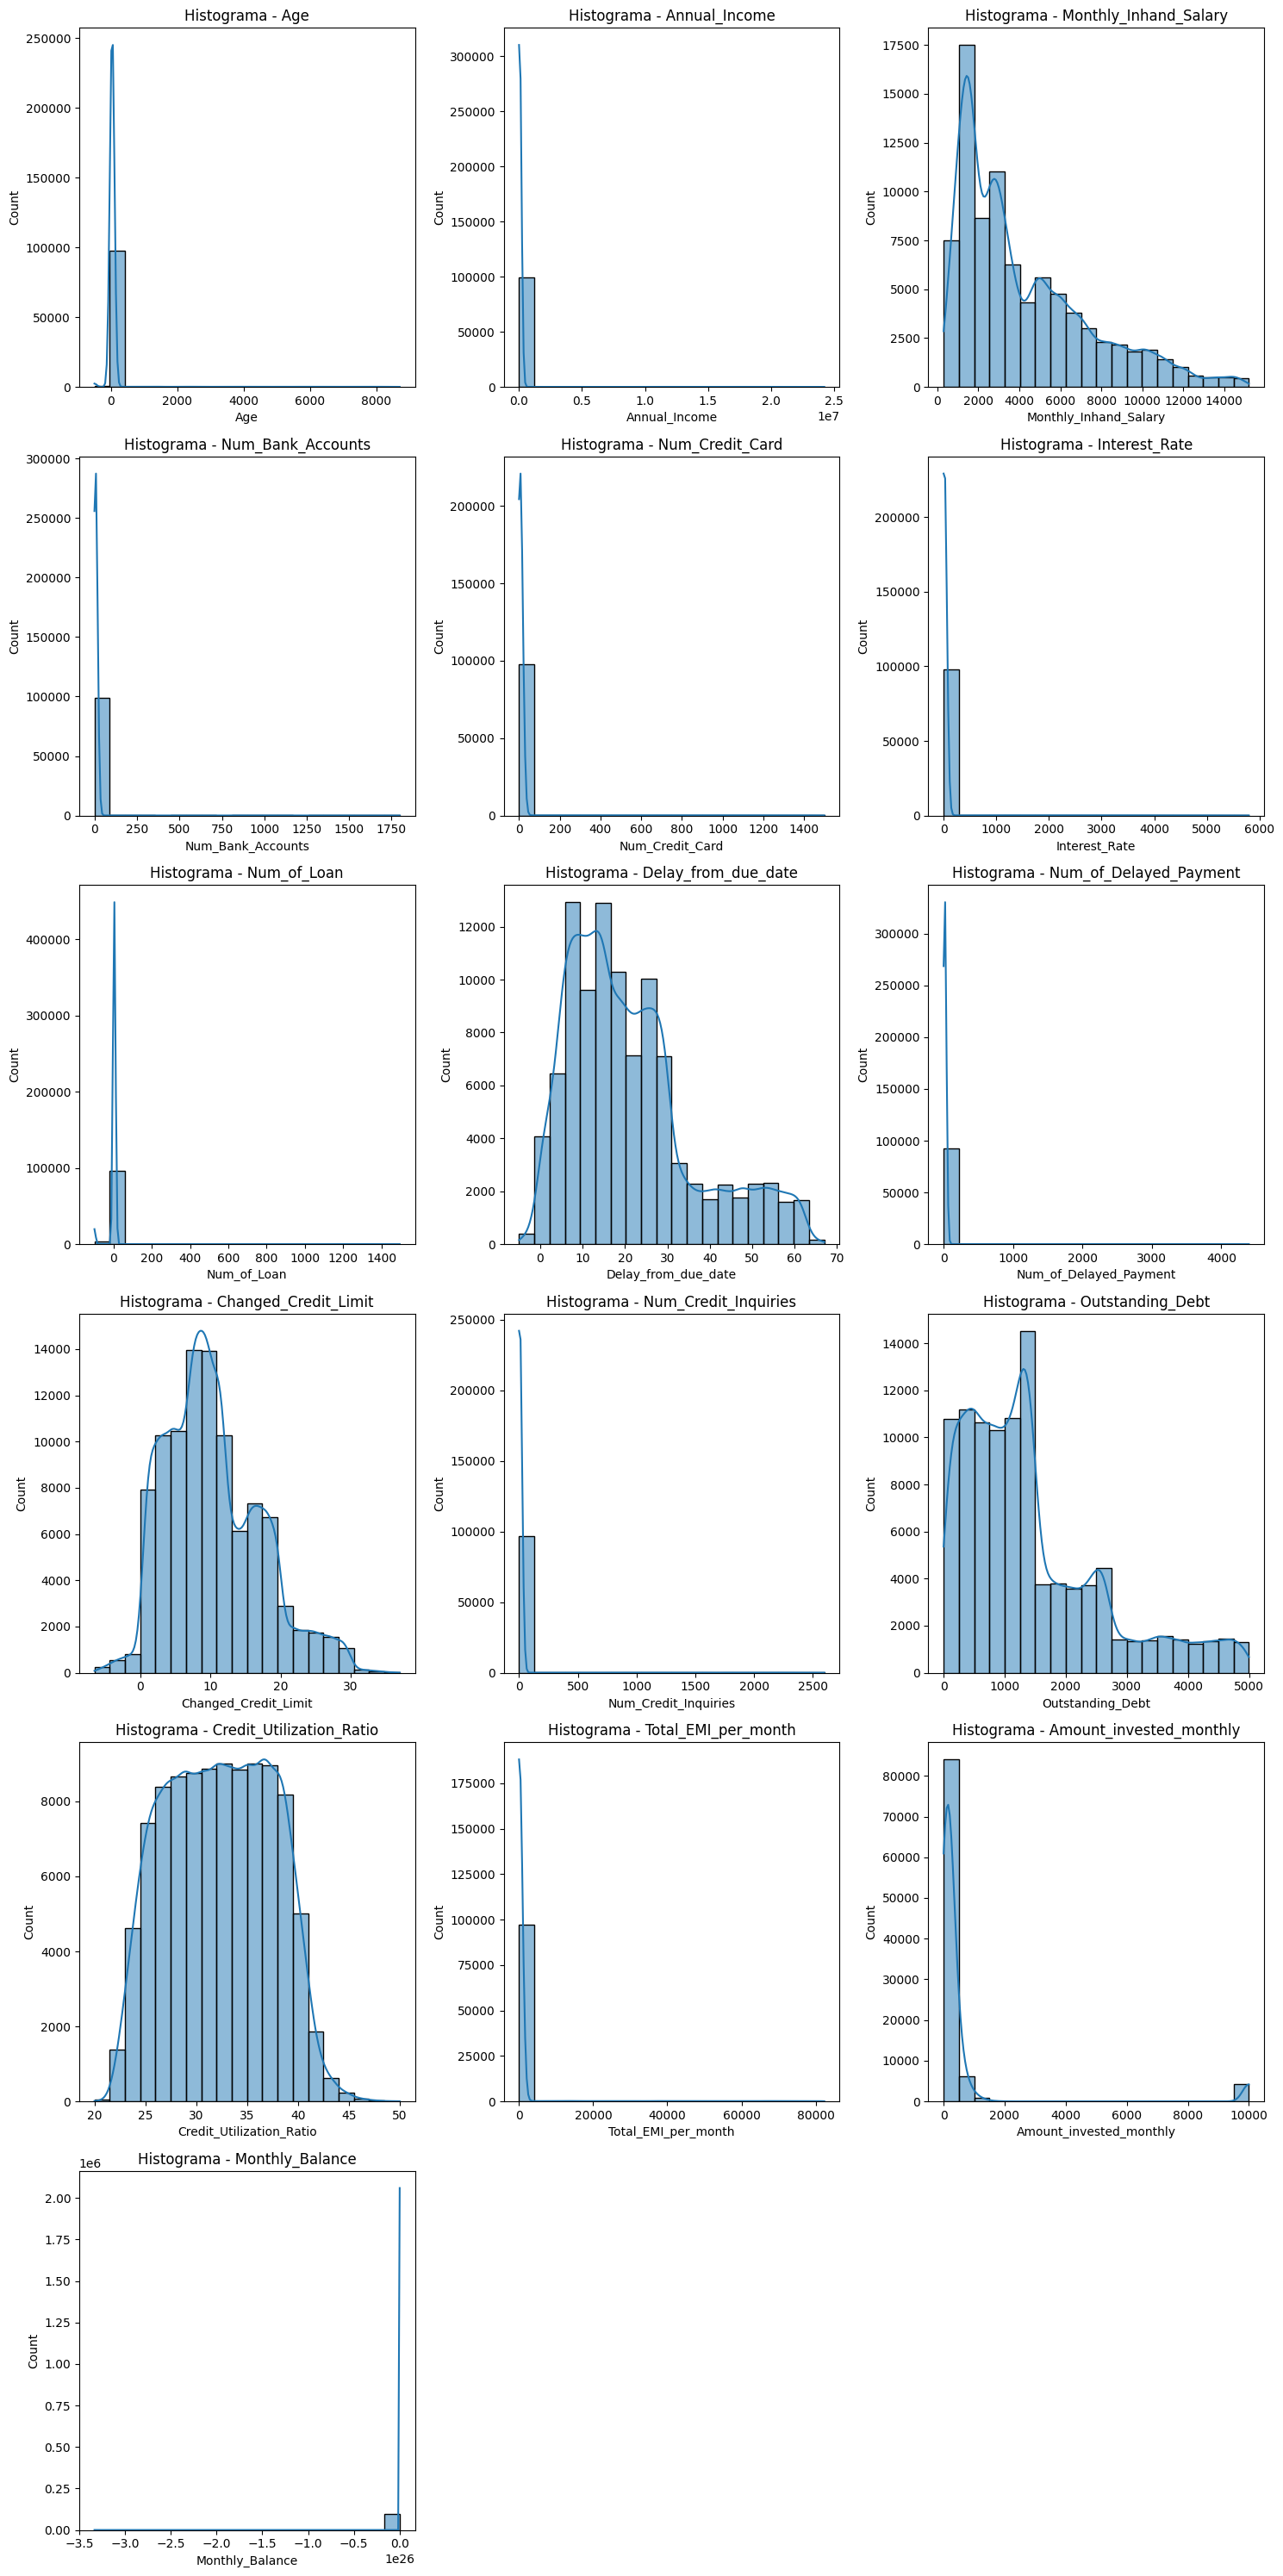

In [ ]:
linhas = -(-len(colunas_num) // 3)
colunas = min(3, len(colunas_num))

fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

# Iterar sobre as colunas numéricas e criar histogramas
for i, coluna in enumerate(colunas_num):
    sns.histplot(data=df_credito, x=df_credito[coluna], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Histograma - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

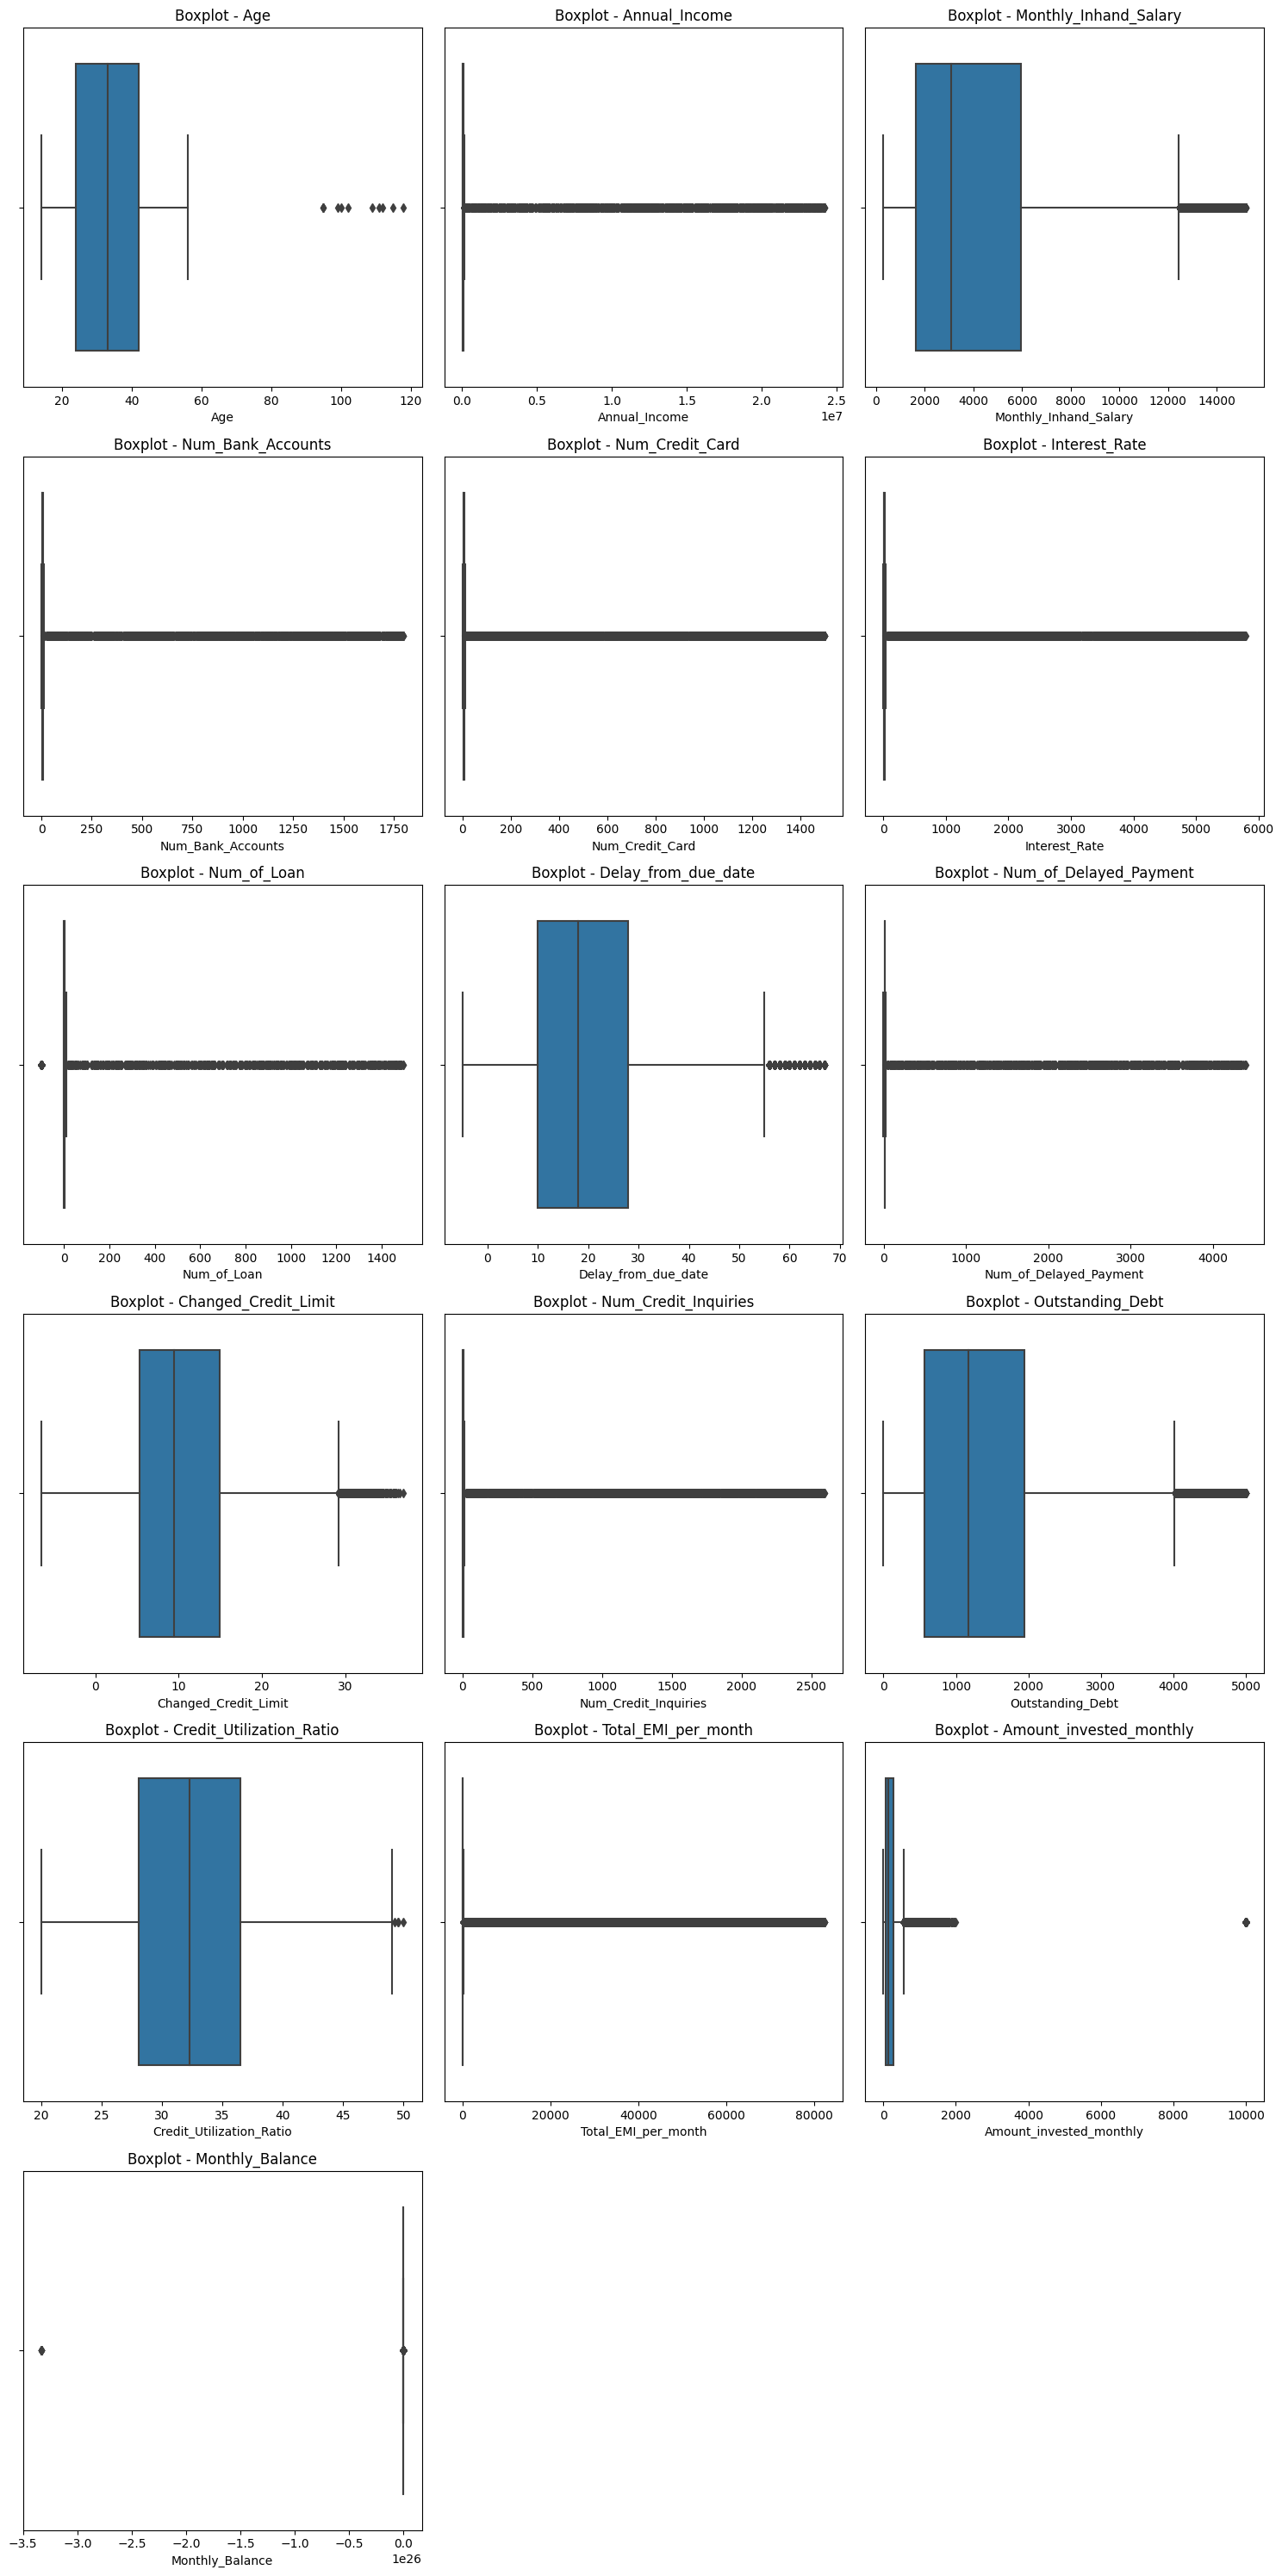

In [ ]:
linhas = -(-len(colunas_num) // 3)
colunas = min(3, len(colunas_num))

fig, axes = plt.subplots(linhas, colunas, figsize=(15, 5 * linhas))

axes = axes.flatten()

# Iterar sobre as colunas numéricas e criar Boxplot
for i, coluna in enumerate(colunas_num):
    sns.boxplot(data=df_credito, x=df_credito[coluna], ax=axes[i])
    axes[i].set_title(f'Boxplot - {coluna}')


for i in range(len(colunas_num), linhas * colunas):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

##### Tratamentos

In [52]:
df_credito['Age'] = delimitar_valores(df_credito['Age'],0,120)
df_credito['Num_Bank_Accounts'] = limpar_valores_negativos(df_credito['Num_Bank_Accounts'])
df_credito['Num_of_Loan'] = limpar_valores_negativos(df_credito['Num_of_Loan'])

In [53]:
df_credito.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,97230.000000,1.000000e+05,84998.000000,99979.000000,100000.00000,100000.000000,96124.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,33.328078,1.764157e+05,4194.170850,17.095080,22.47443,72.466040,7.163622,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,10.795980,1.429618e+06,3183.686167,117.416871,129.05741,466.422621,60.314923,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,118.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [54]:
# Retirar os "and" e tirar o espaço após a virgula
# Aplica o get_dummies com separador ","
# Concatena os dataframes e exclui a coluna original

df_credito['Type_of_Loan'] = df_credito['Type_of_Loan'].str.replace(' and ','')
df_credito['Type_of_Loan'] = df_credito['Type_of_Loan'].str.replace(', ',',')


df_cat = df_credito['Type_of_Loan'].str.get_dummies(sep=',')


df_credito = pd.concat([df_credito, df_cat], axis=1)
df_credito = df_credito.drop('Type_of_Loan', axis=1)

df_credito


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Score,Auto Loan,Credit-Builder Loan,Debt Consolidation Loan,Home Equity Loan,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan
0,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,3,7.0,...,Good,1,1,0,1,0,0,0,1,0
1,23.0,Scientist,19114.12,NaN,3.0,4,3,4.0,-1,NaN,...,Good,1,1,0,1,0,0,0,1,0
2,NaN,Scientist,19114.12,NaN,3.0,4,3,4.0,3,7.0,...,Good,1,1,0,1,0,0,0,1,0
3,23.0,Scientist,19114.12,NaN,3.0,4,3,4.0,5,4.0,...,Good,1,1,0,1,0,0,0,1,0
4,23.0,Scientist,19114.12,1824.843333,3.0,4,3,4.0,6,NaN,...,Good,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,4.0,6,7,2.0,23,7.0,...,Poor,1,0,0,0,0,0,0,0,1
99996,25.0,Mechanic,39628.99,3359.415833,4.0,6,7,2.0,18,7.0,...,Poor,1,0,0,0,0,0,0,0,1
99997,25.0,Mechanic,39628.99,3359.415833,4.0,6,5729,2.0,27,6.0,...,Poor,1,0,0,0,0,0,0,0,1
99998,25.0,Mechanic,39628.99,3359.415833,4.0,6,7,2.0,20,NaN,...,Standard,1,0,0,0,0,0,0,0,1


In [55]:
#df_dummies.columns
df_cat.columns

Index(['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan',
       'Personal Loan', 'Student Loan'],
      dtype='object')

In [56]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Age                       97230 non-null   float64 
 1   Occupation                100000 non-null  category
 2   Annual_Income             100000 non-null  float64 
 3   Monthly_Inhand_Salary     84998 non-null   float64 
 4   Num_Bank_Accounts         99979 non-null   float64 
 5   Num_Credit_Card           100000 non-null  int64   
 6   Interest_Rate             100000 non-null  int64   
 7   Num_of_Loan               96124 non-null   float64 
 8   Delay_from_due_date       100000 non-null  int64   
 9   Num_of_Delayed_Payment    92998 non-null   float64 
 10  Changed_Credit_Limit      97909 non-null   float64 
 11  Num_Credit_Inquiries      98035 non-null   float64 
 12  Credit_Mix                100000 non-null  category
 13  Outstanding_Debt          1000

## Aprendizado Supervisioando

### SVM (*Support Vector Machine*)

##### Função para visualização de desempenho dos modelos de classificação

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):

    print("\nMétricas de avaliação de treino:")
    y_pred_train = estimator.predict(X_train)
    cm_train     = confusion_matrix(y_train, y_pred_train)
    ConfusionMatrixDisplay(cm_train).plot(cmap='viridis')
    plt.show()
    print(classification_report(y_train, y_pred_train))
    RocCurveDisplay.from_estimator(estimator, X_train, y_train)

    print("\nMétricas de avaliação de teste:")
    y_pred_test = estimator.predict(X_test)
    cm_test     = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(cm_test).plot(cmap='viridis')
    plt.show()
    print(classification_report(y_test, y_pred_test))
    RocCurveDisplay.from_estimator(estimator, X_test, y_test)

##### Particionando os dados de treino e teste

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

X = df_credito.drop(columns="Credit_Score")
y = df_credito["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### Transformação das colunas numéricas

In [59]:
features_num          = X_train.select_dtypes(include=np.number).columns.tolist()
num_imputer           = SimpleImputer(strategy="mean")
X_train[features_num] = num_imputer.fit_transform(X_train[features_num])
scaler                = StandardScaler()
X_train[features_num] = scaler.fit_transform(X_train[features_num])

##### Transformação das colunas categóricas

In [60]:
features_cat          = X_train.select_dtypes(exclude=np.number).columns.tolist()
cat_imputer           = SimpleImputer(strategy="constant", fill_value="unknown")
X_train[features_cat] = cat_imputer.fit_transform(X_train[features_cat])
encoder               = OneHotEncoder()

##### Combinando features numéricas e categóricas após a transformação usando np.hstack

In [61]:
X_train_cat_encoded  = encoder.fit_transform(X_train[features_cat])
X_train_preprocessed = np.hstack((X_train[features_num], X_train_cat_encoded.toarray()))

##### Pré-processamento dos dados de teste

In [62]:
X_test[features_num] = num_imputer.transform(X_test[features_num])
X_test[features_num] = scaler.transform(X_test[features_num])
X_test[features_cat] = cat_imputer.transform(X_test[features_cat])
X_test_cat_encoded   = encoder.transform(X_test[features_cat])

##### Combinando features numéricas e categóricas após a transformação usando np.hstack

In [63]:
X_test_preprocessed = np.hstack((X_test[features_num], X_test_cat_encoded.toarray()))

##### Treinando o modelo SVM

In [ ]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train_preprocessed, y_train)

##### Avaliando o modelo com as métricas de classificação

In [ ]:
metricas_classificacao(svm_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)

#### Hiperparâmetros:

`C`, `gamma` e `kernel`

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC

##### Dicionário de combinações de hiperparâmetros

In [ ]:
parametros = {
              "kernel": ["linear", "rbf", "poly"],
              "C"     : np.logspace(-2, 2, 5),
              "gamma" : np.logspace(-2, 2, 5)
             }

In [ ]:
splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_svc = GridSearchCV(estimator  = SVC(random_state = 42),
                        param_grid = parametros,
                        scoring    = "f1_weighted",
                        cv         = splitter,
                        verbose    = 10)

##### GridSearchCV

In [ ]:
grid_svc.fit(X_train_preprocessed, y_train)

In [ ]:
best_params = grid_svc.best_params_
best_model  = grid_svc.best_estimator_

svm_model.fit(X_train_preprocessed, y_train)

In [ ]:
print("Melhores hiperparâmetros:", best_params)

In [ ]:
metricas_classificacao(best_model, X_train_preprocessed, X_test_preprocessed, y_train, y_test)